In [1]:
import os
import cv2
import csv
import glob
import json
import pprint

import math

import numpy as np
import pandas as pd

import scipy #pearson correlation
import matplotlib.pyplot as plt #plots
import seaborn as sn # for heatmap 

In [2]:
data_gt = pd.read_csv("/home/kunaldargan/Desktop/featureVectorNanDeleted.csv", index_col=False, header=None)

In [3]:
labels_gt = pd.read_csv("/home/kunaldargan/Desktop/labelVectorNanDeleted.csv",index_col=False, header=None)

In [4]:
labels_gt[0].value_counts()

2.0    12448
1.0      488
3.0      132
4.0      127
Name: 0, dtype: int64

In [5]:
labels_gt.columns=["target"]

In [6]:
XY = pd.concat([data_gt,labels_gt], axis=1)

min_len = min(XY["target"].value_counts())

x_1 = XY.loc[XY['target'] == 1.0]
x_2 = XY.loc[XY['target'] == 2.0]
x_3 = XY.loc[XY['target'] == 3.0]
x_4 = XY.loc[XY['target'] == 4.0]

print(len(x_1), len(x_2), len(x_3), len(x_4))
#min 127

x_1 = x_1.sample(n=len(x_4), replace=True, random_state=1)
x_2 = x_2.sample(n=len(x_4), replace=True, random_state=1)
x_3 = x_3.sample(n=len(x_4), replace=True, random_state=1)

#Verification
XY = pd.concat([x_1, x_2, x_3, x_4], axis=0)
x_1 = XY.loc[XY['target'] == 1.0]
x_2 = XY.loc[XY['target'] == 2.0]
x_3 = XY.loc[XY['target'] == 3.0]
x_4 = XY.loc[XY['target'] == 4.0]

print(len(x_1), len(x_2), len(x_3), len(x_4))
#min 127







488 12448 132 127
127 127 127 127


In [7]:
len(XY)

508

In [8]:
labels_gt = XY["target"] 

In [10]:
labels_gt

37     1.0
235    1.0
396    1.0
72     1.0
255    1.0
393    1.0
203    1.0
133    1.0
335    1.0
448    1.0
144    1.0
129    1.0
460    1.0
71     1.0
237    1.0
390    1.0
281    1.0
178    1.0
276    1.0
254    1.0
357    1.0
402    1.0
468    1.0
395    1.0
252    1.0
156    1.0
413    1.0
398    1.0
50     1.0
68     1.0
      ... 
585    4.0
586    4.0
587    4.0
588    4.0
589    4.0
590    4.0
591    4.0
592    4.0
593    4.0
594    4.0
595    4.0
596    4.0
597    4.0
598    4.0
599    4.0
600    4.0
601    4.0
602    4.0
603    4.0
604    4.0
605    4.0
606    4.0
607    4.0
608    4.0
609    4.0
610    4.0
611    4.0
612    4.0
613    4.0
614    4.0
Name: target, Length: 508, dtype: float64

In [12]:
XY.drop(["target"],axis=1)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,20,21
37,401.0,538.0,808.0,953.0,2638.0,1739.0,0.469229,-0.365528,-0.205392,0.205392,...,605,0.443166,-0.301729,0.146618,736,1047,1124,0.610061,-0.285812,0.422311
235,396.0,570.0,914.0,1196.0,2108.0,2250.0,0.276029,-0.422250,0.032584,-0.032584,...,524,0.572594,-0.450213,0.061674,791,1198,1466,0.398811,-0.401000,0.098020
396,393.0,564.0,894.0,1205.0,2103.0,2218.0,0.271463,-0.425450,0.026614,-0.026614,...,483,0.595138,-0.460938,0.061350,775,1185,1443,0.416380,-0.403323,0.113691
72,378.0,560.0,903.0,1158.0,2042.0,2184.0,0.276250,-0.414966,0.033602,-0.033602,...,621,0.522491,-0.428095,0.072299,779,1171,1419,0.353678,-0.399333,0.042807
255,480.0,644.0,976.0,1253.0,2144.0,2408.0,0.262290,-0.423168,0.057996,-0.057996,...,582,0.502351,-0.447324,0.007454,809,1221,1486,0.352928,-0.402057,0.040871
393,370.0,532.0,877.0,1152.0,2159.0,2171.0,0.304138,-0.424541,0.002771,-0.002771,...,508,0.576490,-0.452137,0.053482,771,1192,1454,0.418284,-0.401156,0.119356
203,391.0,547.0,888.0,1222.0,2433.0,2176.0,0.331327,-0.420366,-0.055760,0.055760,...,449,0.639357,-0.437668,0.120198,830,1227,1536,0.446387,-0.414599,0.150186
133,391.0,572.0,933.0,1302.0,2078.0,2340.0,0.229586,-0.429881,0.059303,-0.059303,...,425,0.627520,-0.449053,0.072171,781,1166,1420,0.487365,-0.404646,0.199243
335,414.0,589.0,931.0,1297.0,2096.0,2357.0,0.235485,-0.433698,0.058612,-0.058612,...,460,0.624183,-0.458946,0.081610,768,1177,1432,0.484985,-0.403295,0.197332
448,401.0,563.0,912.0,1210.0,2152.0,2277.0,0.280190,-0.428034,0.028223,-0.028223,...,496,0.593109,-0.459320,0.067913,772,1185,1445,0.422231,-0.404373,0.120139


In [13]:
data_gt = XY

In [14]:
data_gt

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,target
37,401.0,538.0,808.0,953.0,2638.0,1739.0,0.469229,-0.365528,-0.205392,0.205392,...,0.443166,-0.301729,0.146618,736,1047,1124,0.610061,-0.285812,0.422311,1.0
235,396.0,570.0,914.0,1196.0,2108.0,2250.0,0.276029,-0.422250,0.032584,-0.032584,...,0.572594,-0.450213,0.061674,791,1198,1466,0.398811,-0.401000,0.098020,1.0
396,393.0,564.0,894.0,1205.0,2103.0,2218.0,0.271463,-0.425450,0.026614,-0.026614,...,0.595138,-0.460938,0.061350,775,1185,1443,0.416380,-0.403323,0.113691,1.0
72,378.0,560.0,903.0,1158.0,2042.0,2184.0,0.276250,-0.414966,0.033602,-0.033602,...,0.522491,-0.428095,0.072299,779,1171,1419,0.353678,-0.399333,0.042807,1.0
255,480.0,644.0,976.0,1253.0,2144.0,2408.0,0.262290,-0.423168,0.057996,-0.057996,...,0.502351,-0.447324,0.007454,809,1221,1486,0.352928,-0.402057,0.040871,1.0
393,370.0,532.0,877.0,1152.0,2159.0,2171.0,0.304138,-0.424541,0.002771,-0.002771,...,0.576490,-0.452137,0.053482,771,1192,1454,0.418284,-0.401156,0.119356,1.0
203,391.0,547.0,888.0,1222.0,2433.0,2176.0,0.331327,-0.420366,-0.055760,0.055760,...,0.639357,-0.437668,0.120198,830,1227,1536,0.446387,-0.414599,0.150186,1.0
133,391.0,572.0,933.0,1302.0,2078.0,2340.0,0.229586,-0.429881,0.059303,-0.059303,...,0.627520,-0.449053,0.072171,781,1166,1420,0.487365,-0.404646,0.199243,1.0
335,414.0,589.0,931.0,1297.0,2096.0,2357.0,0.235485,-0.433698,0.058612,-0.058612,...,0.624183,-0.458946,0.081610,768,1177,1432,0.484985,-0.403295,0.197332,1.0
448,401.0,563.0,912.0,1210.0,2152.0,2277.0,0.280190,-0.428034,0.028223,-0.028223,...,0.593109,-0.459320,0.067913,772,1185,1445,0.422231,-0.404373,0.120139,1.0


In [15]:
corMatrix_gt = pd.DataFrame.corr(data_gt)

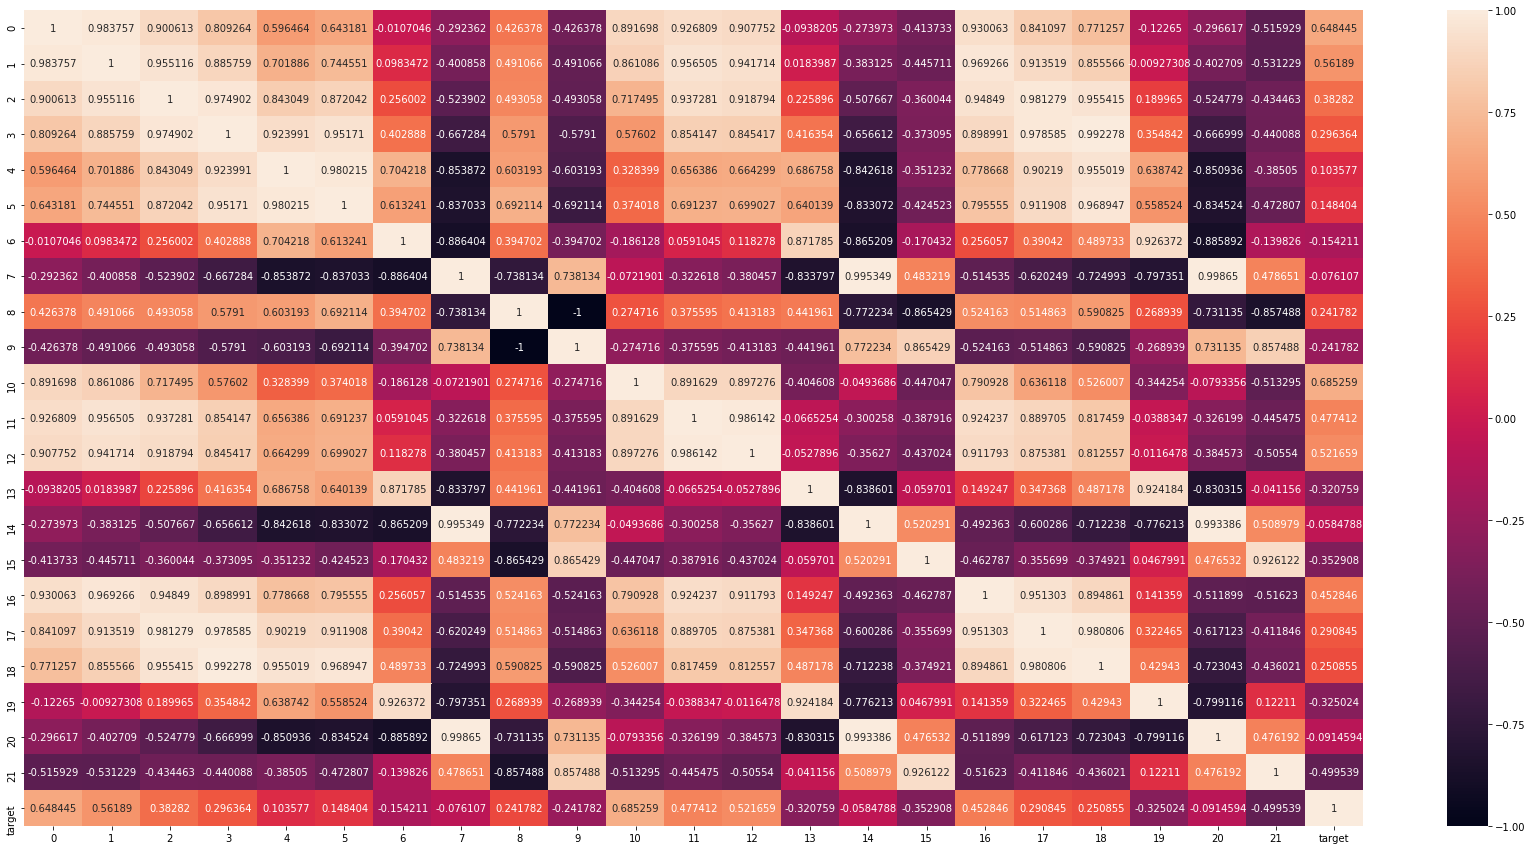

In [16]:
f, ax = plt.subplots(figsize=(30, 15))

ax = sn.heatmap(corMatrix_gt, annot=True, fmt='g')
plt.show()

# COVARIANCE

In [17]:
covarianceMatrix_gt = pd.DataFrame.cov(data_gt)

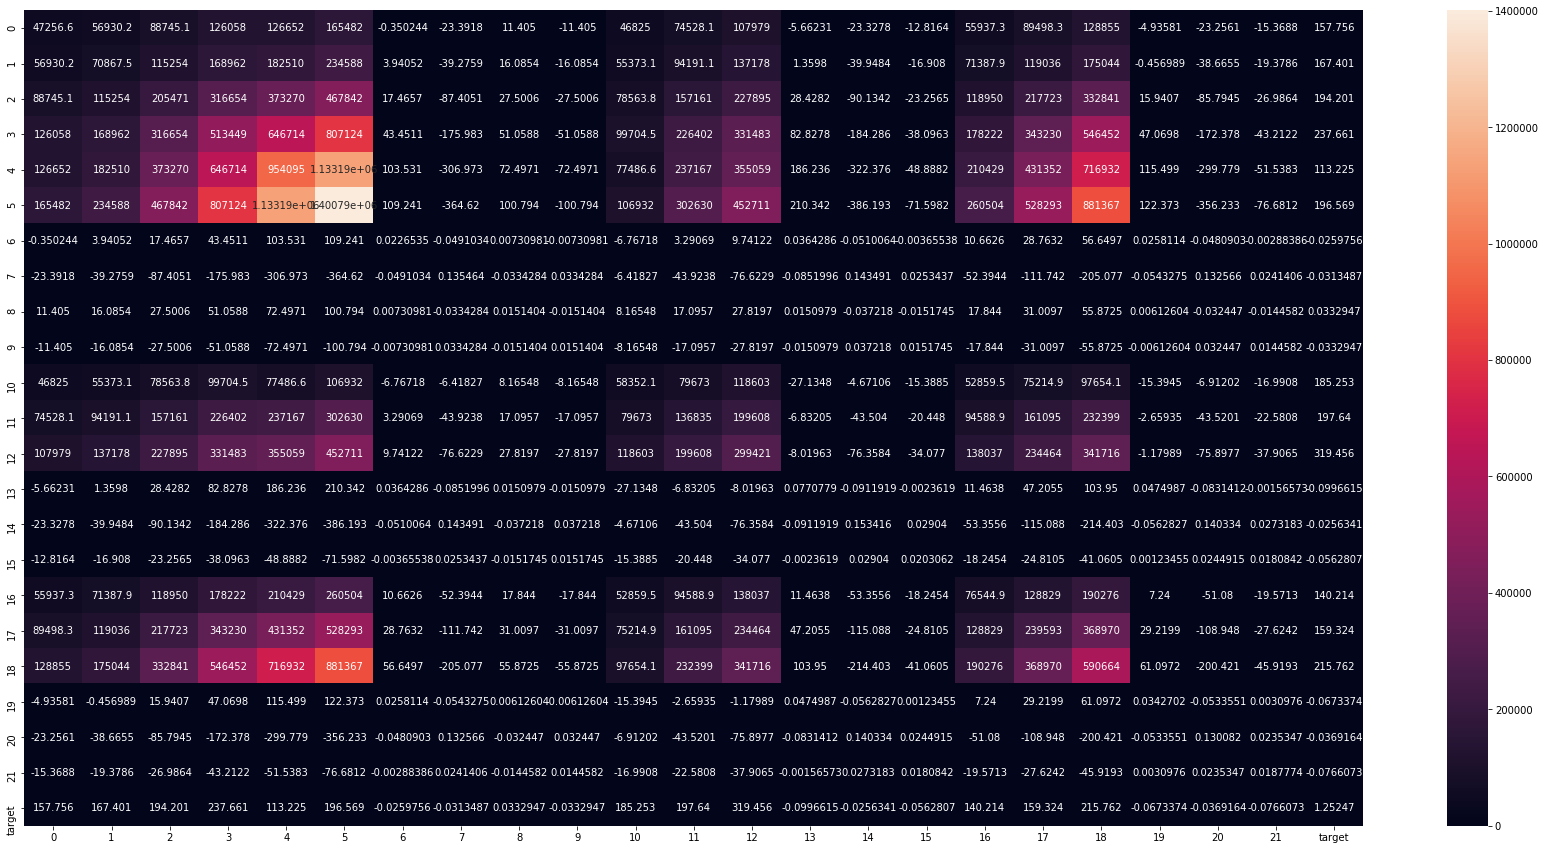

In [18]:
f, ax = plt.subplots(figsize=(30, 15))

ax = sn.heatmap(covarianceMatrix_gt, annot=True, fmt='g')
plt.show()

# CLEARLY SEEN HIGH CORRELATION OF THE ORDER 0.9 FOR FEATURES

In [19]:
corr = data_gt.corr().abs()

s = corr.unstack()
sorted_values = s.sort_values(kind="quicksort")
df = sorted_values[sorted_values<1.0][::-1][::2].to_frame()
df

0
7      20      0.998650
       14      0.995349
14     20      0.993386
18     3       0.992278
12     11      0.986142
0      1       0.983757
2      17      0.981279
18     17      0.980806
4      5       0.980215
3      17      0.978585
       2       0.974902
1      16      0.969266
18     5       0.968947
1      11      0.956505
2      18      0.955415
1      2       0.955116
4      18      0.955019
5      3       0.951710
16     17      0.951303
       2       0.948490
12     1       0.941714
2      11      0.937281
0      16      0.930063
11     0       0.926809
6      19      0.926372
15     21      0.926122
11     16      0.924237
19     13      0.924184
3      4       0.923991
12     2       0.918794
...                 ...
10     6       0.186128
15     6       0.170432
6      target  0.154211
13     16      0.149247
5      target  0.148404
16     19      0.141359
21     6       0.139826
19     0       0.122650
21     19      0.122110
12     6       0.118278
4      target  0.103577
1      6       0.098347
0      13      0.093820
target 20      0.091459
20     10      0.079336
target 7       0.076107
7      10      0.072190
13     11      0.066525
15     13      0.059701
6      11      0.059104
target 14      0.058479
12     13      0.052790
10     14      0.049369
15     19      0.046799
13     21      0.041156
19     11      0.038835
1      13      0.018399
19     12      0.011648
0      6       0.010705
19     1       0.009273

[252 rows x 1 columns]

In [20]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
data_rescaled = scaler.fit_transform(data_gt)

In [21]:
pd.DataFrame(data_rescaled) #min max scaled values

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,0.088126,0.072850,0.164811,0.244931,0.717076,0.376539,0.861452,0.141362,0.424700,0.575300,...,0.689044,0.184931,0.378587,0.178597,0.268142,0.287018,1.000000,0.202975,0.836900,0.0
1,0.083488,0.099958,0.223831,0.332137,0.560225,0.499879,0.596434,0.088998,0.829080,0.170920,...,0.833405,0.062641,0.264716,0.217576,0.345857,0.402637,0.731561,0.093695,0.357887,0.0
2,0.080705,0.094875,0.212695,0.335367,0.558745,0.492155,0.590170,0.086045,0.818936,0.181064,...,0.858550,0.053808,0.264281,0.206237,0.339166,0.394861,0.753886,0.091491,0.381034,0.0
3,0.066790,0.091487,0.217706,0.318500,0.540693,0.483949,0.596737,0.095723,0.830810,0.169190,...,0.777522,0.080857,0.278959,0.209072,0.331961,0.386748,0.674210,0.095276,0.276331,0.0
4,0.161410,0.162643,0.258352,0.352593,0.570879,0.538016,0.577588,0.088151,0.872263,0.127737,...,0.755058,0.065020,0.192032,0.230333,0.357694,0.409398,0.673257,0.092692,0.273471,0.0
5,0.059369,0.067768,0.203229,0.316347,0.575318,0.480811,0.634991,0.086884,0.778421,0.221579,...,0.837750,0.061056,0.253734,0.203402,0.342769,0.398580,0.756305,0.093547,0.389402,0.0
6,0.078850,0.080474,0.209354,0.341468,0.656407,0.482018,0.672288,0.090738,0.678961,0.321039,...,0.907871,0.072973,0.343170,0.245216,0.360782,0.426302,0.792016,0.080793,0.434942,0.0
7,0.078850,0.101652,0.234410,0.370178,0.551347,0.521603,0.532726,0.081954,0.874483,0.125517,...,0.894668,0.063596,0.278787,0.210489,0.329388,0.387086,0.844088,0.090235,0.507405,0.0
8,0.100186,0.116053,0.233296,0.368383,0.556674,0.525706,0.540818,0.078430,0.873309,0.126691,...,0.890946,0.055449,0.291442,0.201276,0.335049,0.391143,0.841064,0.091517,0.504582,0.0
9,0.088126,0.094028,0.222717,0.337161,0.573247,0.506396,0.602142,0.083659,0.821670,0.178330,...,0.856287,0.055140,0.273080,0.204111,0.339166,0.395538,0.761321,0.090495,0.390558,0.0


In [22]:
#95% of variance
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.95)
pca.fit(data_rescaled)
reduced = pca.transform(data_rescaled)

In [23]:
pd.DataFrame(reduced)

,0,1,2,3
0,-0.032220,-0.948575,0.593960,0.377906
1,0.287380,-0.857488,0.132097,-0.135631
2,0.273742,-0.896591,0.136680,-0.112531
3,0.256434,-0.794938,0.091742,-0.174736
4,0.355800,-0.743748,0.074919,-0.241723
5,0.252734,-0.903960,0.157640,-0.081387
6,0.275492,-0.949487,0.302687,0.045054
7,0.294431,-0.944112,0.175741,-0.097739
8,0.309865,-0.930951,0.184547,-0.093467
9,0.289316,-0.896760,0.150010,-0.106157


cummulative vairances [0.60328945 0.84513932 0.93141942 0.9747333  0.98826997 0.99236657
 0.99561663 0.9970589  0.99809718 0.99873846 0.99918435 0.99941733
 0.99955631 0.99967552 0.99977121 0.99984152 0.99990746 0.99994626
 0.99997194 0.99999027 0.99999842 1.         1.        ]


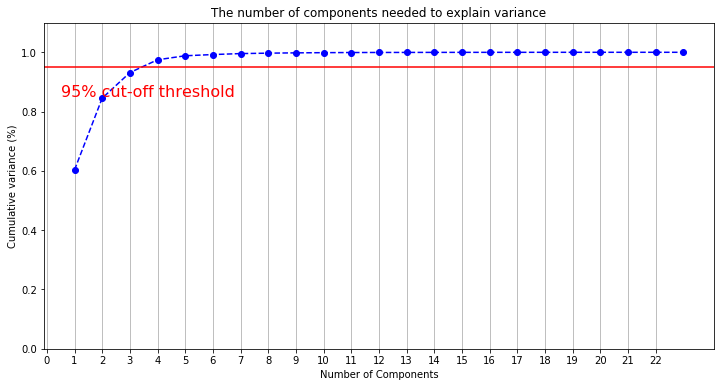

In [27]:
pca = PCA().fit(data_rescaled)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,6)

fig, ax = plt.subplots()
xi = np.arange(1, 24, step=1)
y = np.cumsum(pca.explained_variance_ratio_)
print("cummulative vairances",y)

plt.ylim(0.0,1.1)
plt.plot(xi, y, marker='o', linestyle='--', color='b')

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 23, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [52]:
# #99% of variance
# from sklearn.decomposition import PCA
# pca = PCA(n_components = 0.99)
# pca.fit(data_rescaled)
# reduced = pca.transform(data_rescaled)

In [53]:
# pd.DataFrame(reduced)

,0,1,2,3
0,1.878581,0.204496,-0.513770,0.059960
1,1.770628,0.184941,-0.408542,-0.076778
2,1.757583,0.137304,-0.321442,-0.095694
3,1.904268,0.183607,-0.337329,-0.097668
4,1.950438,0.352830,-0.403047,-0.104672
5,2.007038,0.361471,-0.506874,-0.123594
6,1.901865,0.066923,-0.371126,0.010117
7,2.013892,0.134583,-0.412459,0.095588
8,1.955440,0.183894,-0.374691,-0.018710
9,1.984978,0.195462,-0.366784,-0.070440


In [28]:
X= pca.fit_transform(data_rescaled)

In [29]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,...,13,14,15,16,17,18,19,20,21,22
0,-0.032220,-0.948575,0.593960,0.377906,0.428957,0.086693,0.016661,-0.223969,0.145311,-0.117715,...,0.004666,0.037465,0.013602,-0.018007,-0.005777,-0.011682,0.008152,-0.007570,-0.003044,4.137525e-16
1,0.287380,-0.857488,0.132097,-0.135631,0.071970,0.028440,-0.019806,0.001562,-0.030569,0.024314,...,0.003617,0.003256,-0.003950,0.001289,0.001122,0.000588,0.001548,-0.001074,0.000249,2.263209e-16
2,0.273742,-0.896591,0.136680,-0.112531,0.056129,0.037542,-0.030027,-0.014648,-0.024900,0.031547,...,0.007813,0.000184,-0.005164,-0.005017,-0.007511,-0.003723,0.002377,0.001280,0.000508,5.087089e-16
3,0.256434,-0.794938,0.091742,-0.174736,0.119562,-0.028547,0.004996,0.059594,-0.049677,0.025135,...,0.010183,0.008484,-0.001655,0.000110,0.001312,0.002172,0.002373,-0.003738,-0.000247,3.395228e-16
4,0.355800,-0.743748,0.074919,-0.241723,0.069640,0.033030,0.015881,0.008335,-0.019177,-0.033636,...,-0.008115,-0.015272,0.001172,-0.006032,-0.009159,-0.002222,0.003111,0.001763,0.001364,-3.558880e-17
5,0.252734,-0.903960,0.157640,-0.081387,0.113825,0.011018,0.005147,-0.041619,-0.022722,0.033043,...,-0.004335,0.004090,-0.000838,-0.005741,-0.000638,-0.000744,0.000340,0.000291,0.000345,-2.567286e-16
6,0.275492,-0.949487,0.302687,0.045054,0.095273,0.026720,0.083390,-0.031565,-0.009886,0.051497,...,0.028267,0.024584,0.017181,-0.020201,0.000356,-0.002853,-0.002024,0.001189,-0.001447,-1.587390e-16
7,0.294431,-0.944112,0.175741,-0.097739,-0.022190,0.102392,-0.170619,-0.062784,-0.013373,-0.000776,...,0.023026,0.007650,0.005697,-0.001542,-0.000200,-0.000735,0.011410,0.006410,-0.000343,-2.560898e-16
8,0.309865,-0.930951,0.184547,-0.093467,-0.013798,0.100958,-0.169296,-0.044031,-0.004806,-0.005134,...,0.009920,0.006213,-0.001892,-0.007961,-0.007650,-0.000604,0.003369,0.002170,-0.002397,-2.031268e-16
9,0.289316,-0.896760,0.150010,-0.106157,0.057922,0.035100,-0.033261,-0.012407,-0.013074,0.016266,...,0.003284,0.002399,-0.006073,-0.005432,-0.001431,0.001154,0.005408,0.000693,-0.000150,-4.002850e-17


In [30]:
y

array([0.60328945, 0.84513932, 0.93141942, 0.9747333 , 0.98826997,
       0.99236657, 0.99561663, 0.9970589 , 0.99809718, 0.99873846,
       0.99918435, 0.99941733, 0.99955631, 0.99967552, 0.99977121,
       0.99984152, 0.99990746, 0.99994626, 0.99997194, 0.99999027,
       0.99999842, 1.        , 1.        ])

In [31]:
from mpl_toolkits import mplot3d 

In [32]:
labels = labels_gt.values.ravel()

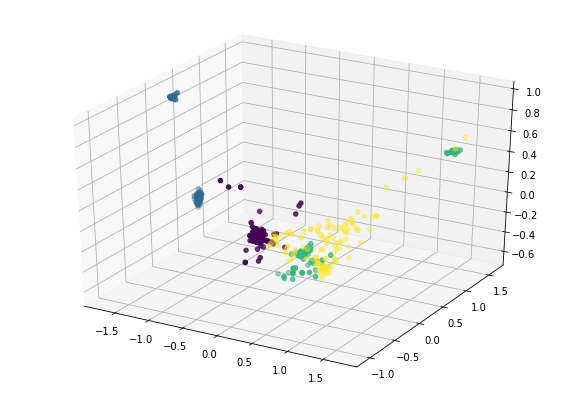

In [42]:
fig = plt.figure(figsize = (10, 7)) 
axes = plt.axes(projection="3d") 

XY = pd.concat([X,labels_gt], axis=1)

x_1 = XY.loc[XY['target'] == 1.0]
x_2 = XY.loc[XY['target'] == 2.0]
x_3 = XY.loc[XY['target'] == 3.0]
x_4 = XY.loc[XY['target'] == 4.0]


colors = ('red','blue','green','violet')
labels = (1.0, 2.0, 3.0, 4.0)
data = (x_1, x_2, x_3, x_4)

# for i,val in enumerate(X):
#     if i == 50 : 
#         break
    
#     x, y, z = val[0], val[1], val[2]
#     axes.scatter(x, y, z, alpha=0.8, c=colors, edgecolors='none', label=labels[i])


axes.scatter(X[:,0], X[:,1], X[:,2], c=labels.ravel())
    
plt.show()

No handles with labels found to put in legend.


Legend


In [43]:
from sklearn.cluster import KMeans

In [51]:
estimator = KMeans(n_clusters=7)

In [52]:
estimator.fit(X)

KMeans(n_clusters=7)

No handles with labels found to put in legend.


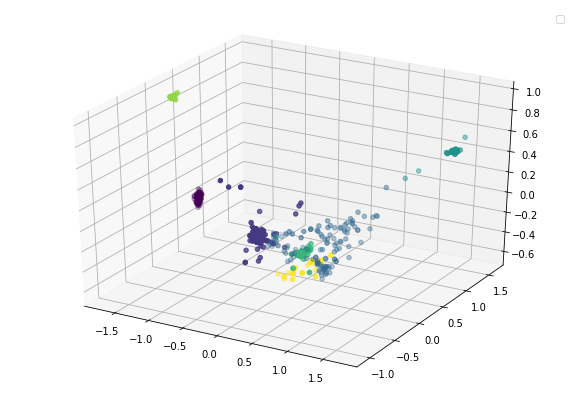

In [53]:
labels_est = estimator.labels_
fig = plt.figure(figsize = (10, 7)) 
ax = plt.axes(projection ="3d") 

ax.scatter(X[:, 0], X[:, 1], X[:, 2],
           c=labels_est.astype(np.float))
ax.legend()